Nama : Aryo Adi Putro
Kelas : TI 3G
NIM : 2341720084
Absen : 07

# Praktikum 2 - Klasifikasi SVM dengan Data Dummy Non-Linier

Pada praktikum ini digunakan data non-linier untuk menunjukkan penggunaan kernel trick pada SVM, sehingga model tetap dapat membuat decision boundary meskipun data tidak dapat dipisahkan secara linier.

## Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Membuat Kembali Fungsi Plotting

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Membuat Data Dummy Non-Linier

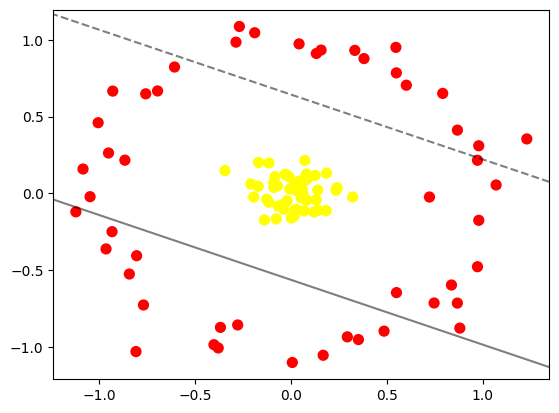

In [3]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Karena data tidak dapat dipisahkan secara linier, diperlukan proyeksi ke ruang berdimensi lebih tinggi menggunakan fungsi radial.

In [4]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = np.exp(-(X**2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.72132919, -0.0234126 ],
       [ 0.5464489 ,  0.95117858],
       [-0.03856976, -0.10283415],
       [ 0.1851081 ,  0.13166192],
       [-1.08456964,  0.15889393],
       [ 0.08106239, -0.04400768],
       [ 0.16729473, -1.05395023],
       [ 0.05246785, -0.02805642],
       [ 0.23377543,  0.02062954],
       [ 0.23992141,  0.03664861],
       [ 0.04163531,  0.97388405],
       [-0.93326026, -0.24899047],
       [ 0.01570176, -0.14863724],
       [ 0.13083394, -0.04222489],
       [-0.01145826,  0.10883043],
       [ 0.02662904, -0.10322497],
       [ 0.79048794,  0.65149893],
       [-0.03626427, -0.06714542],
       [-0.27834557, -0.85664466],
       [-0.16947287,  0.20168437],
       [ 0.87976135, -0.8771926 ],
       [-0.26948898,  1.08728414],
       [ 0.05744301,  0.02890311],
       [ 0.38011253,  0.8781465 ],
       [ 0.13898457,  0.02236405],
       [-0.03036576,  0.12439662],
       [-0.12715582, -0.0379397 ],
       [ 0.18288049, -0.11176687],
       [ 0.54874848,  0.78499225],
       [-0.02869406,  0.12074453],
       [-0.00688243,  0.02799439],
       [-1.00569926,  0.46055812],
       [-0.80845097, -1.03005383],
       [ 0.86709695,  0.41230151],
       [-0.96457076, -0.36151292],
       [-0.08388783,  0.1087357 ],
       [ 0.02411739,  0.02116387],
       [-0.84304447, -0.52507069],
       [-0.40207576, -0.98530338],
       [ 0.97171232,  0.21609298],
       [-0.76931286, -0.72665009],
       [ 0.97854257, -0.17521266],
       [-0.95167093,  0.26327694],
       [ 0.48468721, -0.89688793],
       [-0.17144694,  0.04620611],
       [ 0.07853291,  0.08851438],
       [-1.1217099 , -0.11986497],
       [ 0.978244  ,  0.31041683],
       [ 0.29321746, -0.93409263],
       [ 0.83607302, -0.59650472],
       [ 0.33226407,  0.93173053],
       [-0.92957505,  0.66644168],
       [-0.18958629,  1.04646582],
       [ 0.00638517, -1.10102508],
       [ 0.04647436,  0.08094764],
       [-0.11622865, -0.05785061],
       [-0.13861806, -0.17259341],
       [-1.04776935, -0.02134027],
       [-0.80508   , -0.40567793],
       [ 0.06750487, -0.11355977],
       [ 0.13161323,  0.9114212 ],
       [-0.08955284,  0.03888679],
       [ 0.1254014 ,  0.11691344],
       [-0.3797285 , -1.00646206],
       [-0.09073952,  0.0686438 ],
       [-0.02098505, -0.04857104],
       [ 0.06315467, -0.00473877],
       [-0.75762585,  0.64868003],
       [ 1.06876512,  0.05500295],
       [ 0.15633251,  0.93357429],
       [ 0.9716587 , -0.47741704],
       [ 0.00134087, -0.15953351],
       [-0.07763497, -0.16640652],
       [-0.11549051,  0.19785086],
       [-0.69601277,  0.66740471],
       [ 0.02186615,  0.06903848],
       [-0.34456051,  0.14870959],
       [-0.36810369, -0.87248861],
       [ 0.07994784,  0.12467294],
       [ 0.11915563, -0.12101372],
       [ 0.86671368, -0.71424902],
       [-0.28724742,  0.98525035],
       [ 0.74552146, -0.71369266],
       [ 0.05353565,  0.05667109],
       [ 0.54933399, -0.64596042],
       [ 0.60067807,  0.70477547],
       [ 0.08341112,  0.09684942],
       [-0.20997801,  0.06126726],
       [ 0.07191906,  0.21488244],
       [-0.60753192,  0.82328986],
       [-0.07045852,  0.04840093],
       [ 0.14065732, -0.11040315],
       [ 0.35096412, -0.95177786],
       [ 0.01567595, -0.11514267],
       [-0.1948209 , -0.02365296],
       [ 0.32083239, -0.02349085],
       [ 0.06039709,  0.07402402],
       [-0.86624691,  0.21652552],
       [-0.0678831 , -0.08221063],
       [ 1.22877376,  0.35487212]]), y=array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]))>

## Langkah 2 - Fitting Model

In [5]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil keputusan SVM dengan kernel RBF.

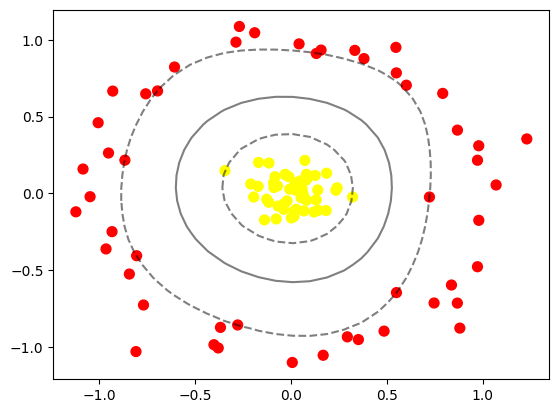

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')